In [158]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns


In [159]:
df = pd.read_csv('Life Expectancy Data.csv')
df.tail(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0


In [160]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country,2938,193,Japan,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2938,NaN,NaN,NaN,2007.52,4.61384,2000,2004,2008,2012,2015
Status,2938,2,Developing,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,2928,NaN,NaN,NaN,69.2249,9.52387,36.3,63.1,72.1,75.7,89
Adult Mortality,2928,NaN,NaN,NaN,164.796,124.292,1,74,144,228,723
...,...,...,...,...,...,...,...,...,...,...,...
Population,2286,NaN,NaN,NaN,1.27534e+07,6.10121e+07,34,195793,1.38654e+06,7.42036e+06,1.29386e+09
thinness 1-19 years,2904,NaN,NaN,NaN,4.8397,4.42019,0.1,1.6,3.3,7.2,27.7
thinness 5-9 years,2904,NaN,NaN,NaN,4.87032,4.50888,0.1,1.5,3.3,7.2,28.6
Income composition of resources,2771,NaN,NaN,NaN,0.627551,0.210904,0,0.493,0.677,0.779,0.948


In [161]:
avg_pop_by_country = df.groupby(by=["Country"]).Population.mean()
pd.set_option('display.max_rows', 20)
print(avg_pop_by_country)

Country
Afghanistan                           9.972260e+06
Albania                               6.969116e+05
Algeria                               2.164983e+07
Angola                                1.014710e+07
Antigua and Barbuda                            NaN
                                          ...     
Venezuela (Bolivarian Republic of)             NaN
Viet Nam                                       NaN
Yemen                                          NaN
Zambia                                6.260246e+06
Zimbabwe                              8.021343e+06
Name: Population, Length: 193, dtype: float64


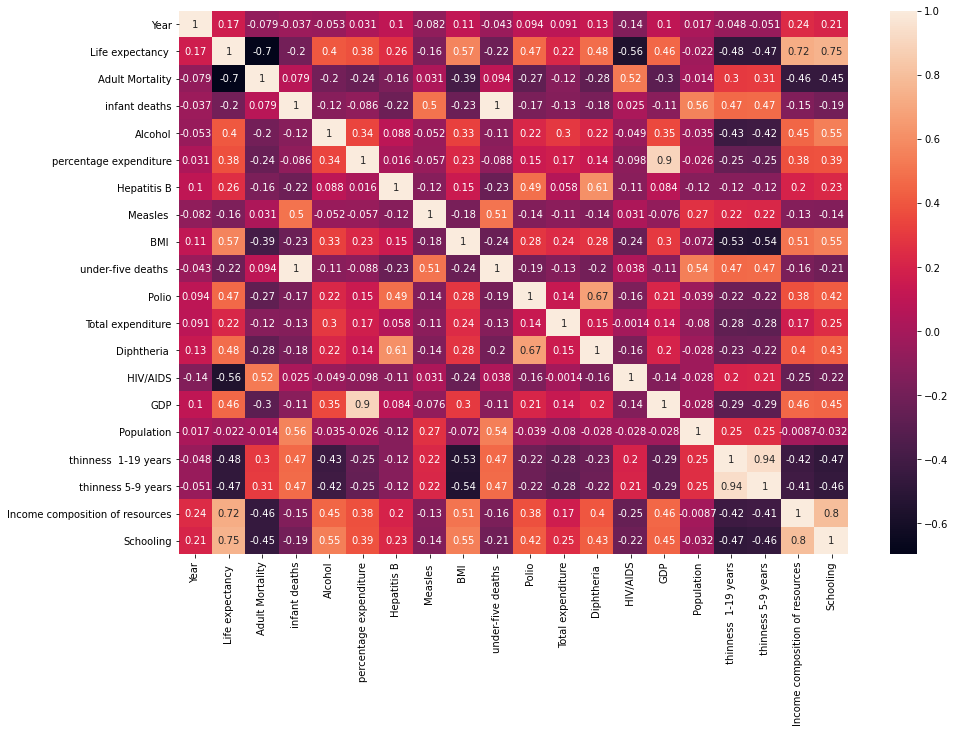

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [163]:
df_nv = pd.DataFrame(data=df.isna().sum(), columns = ["Number of Null Values"]).reset_index()
df_nv.columns = ["Features", "Number of Null Values"]
df_nv.pivot_table(index=df_nv.Features, aggfunc='sum', margins=True, margins_name='Total')

,Number of Null Values
Features,
BMI,34
HIV/AIDS,0
thinness 1-19 years,34
thinness 5-9 years,34
Adult Mortality,10
...,...
Year,0
infant deaths,0
percentage expenditure,0


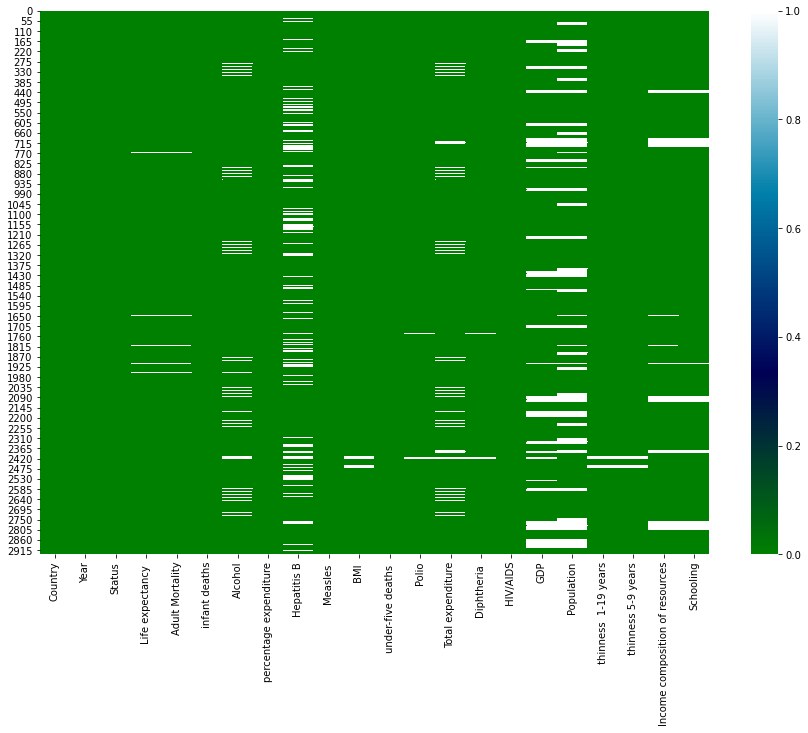

In [164]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.isnull(df), cmap = "ocean")

In [165]:
data_1 = df.drop(columns=["Year"], axis=1)
data_1.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [166]:
data_1.columns = data_1.columns.str.replace(' ', '')
data_1.columns

Index(['Country', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [167]:
data_1["Schooling"] = data_1["Schooling"].fillna(data_1["Schooling"].mean())
data_1["BMI"] = data_1["BMI"].fillna(data_1["BMI"].mean())
data_1["Alcohol"] = data_1["Alcohol"].fillna(data_1["Alcohol"].mean())
data_1["AdultMortality"] = data_1["AdultMortality"].fillna(data_1["AdultMortality"].mean())
data_1["Incomecompositionofresources"] = data_1["Incomecompositionofresources"].fillna(data_1["Incomecompositionofresources"].mean())
data_1["HepatitisB"] = data_1["HepatitisB"].fillna(data_1["HepatitisB"].mean())
data_1["Lifeexpectancy"] = data_1["Lifeexpectancy"].fillna(data_1["Lifeexpectancy"].mean())
data_1["thinness1-19years"] = data_1["thinness1-19years"].fillna(data_1["thinness1-19years"].mean())
data_1["GDP"] = data_1["GDP"].fillna(data_1["GDP"].mean())
data_1["Polio"] = data_1["Polio"].fillna(data_1["Polio"].mean())
data_1["Totalexpenditure"] = data_1["Totalexpenditure"].fillna(data_1["Totalexpenditure"].mean())
data_1["Diphtheria"] = data_1["Diphtheria"].fillna(0)
data_1["thinness5-9years"] = data_1["thinness5-9years"].fillna(data_1["thinness5-9years"].mean())
data_1["Population"] = data_1["Population"].fillna(data_1["Population"].mean())

In [168]:
data_1.head(20)

,Country,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [169]:
df_nv_1 = pd.DataFrame(data=data_1.isnull().sum(), columns = ["Number of Null Values"]).reset_index()
df_nv_1.columns = ["Features", "Number of Null Values"]
df_nv_1.pivot_table(index=df_nv_1.Features, aggfunc='sum', margins=True, margins_name='Total')

,Number of Null Values
Features,
AdultMortality,0
Alcohol,0
BMI,0
Country,0
Diphtheria,0
...,...
percentageexpenditure,0
thinness1-19years,0
thinness5-9years,0


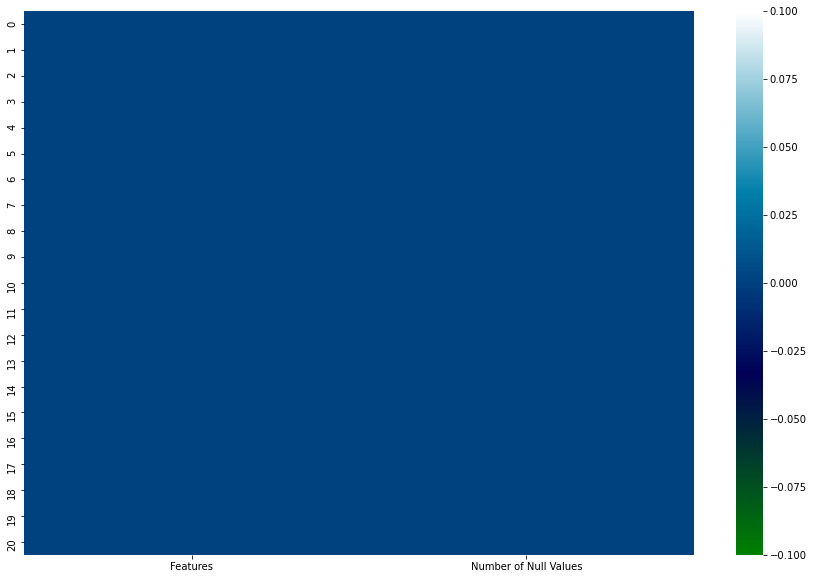

In [170]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.isnull(df_nv_1), cmap = "ocean")

In [171]:
cols = list(data_1.columns.values)
cols.remove("Country")


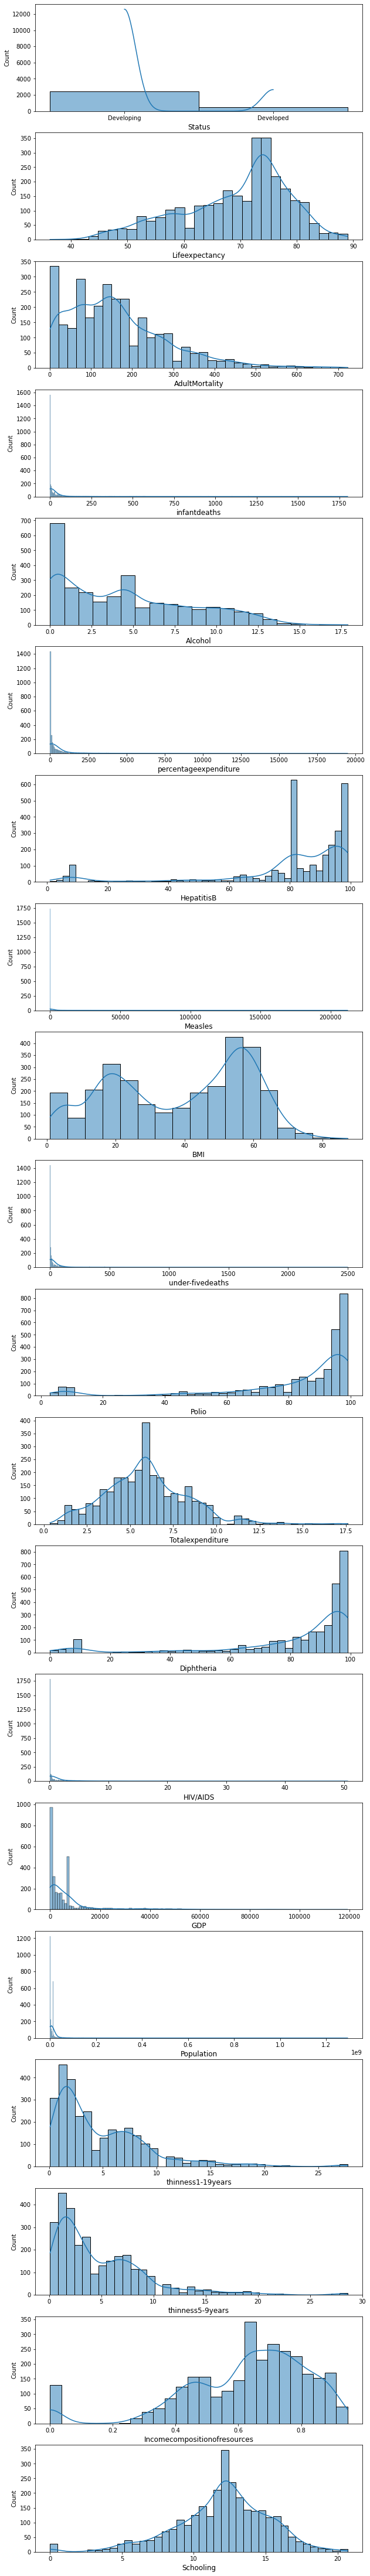

In [172]:
cols = list(data_1.columns.values)
cols.remove("Country")
fig, ax = plt.subplots(nrows = len(cols), ncols = 1, figsize = (10, 80))
for i in range(len(cols)):
    sns.histplot(ax=ax[i],
                 data=data_1, 
                 x=cols[i], 
                 kde=True)
    
    ax[i].set_xlabel(cols[i], fontsize = 12)


plt.show()

In [173]:
data_1.columns = data_1.columns.str.replace(' ', '')
data_1.columns

Index(['Country', 'Status', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths',
       'Alcohol', 'percentageexpenditure', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Totalexpenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [174]:
data_2 = data_1.drop(['Country', 'Status'], axis = 1)

In [175]:
data_2.head()


,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(data_2),columns=data_2.columns)



In [177]:
df_scale.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,-0.444448,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,-3.278638,0.925806,-0.684260,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931
1,-0.980950,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,-1.051482,0.934140,-0.806510,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570
2,-0.980950,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,-0.880163,0.913306,-0.725010,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209
3,-1.023029,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,-0.666013,1.075815,-0.602760,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847
4,-1.054587,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,-0.623183,0.804966,-0.562011,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764


In [178]:
y = data_1['Lifeexpectancy']
X = df_scale.drop(['Lifeexpectancy'],axis=1)

In [181]:
import scipy.stats as stats
stats.ttest_ind(data_1.loc[data_1['Status']=='Developed','Lifeexpectancy'],data_1.loc[data_1['Status']=='Developing','Lifeexpectancy'])

Ttest_indResult(statistic=29.805188781530223, pvalue=9.034938663789684e-171)

In [ ]:
import scipy.stats as stats
stats.ttest_ind(data.loc[data['Status']=='Developed','Life_Expectancy'],data.loc[data['Status']=='Developing','Life_Expectancy'])

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [137]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2350, 18)
(588, 18)
(2350,)
(588,)


In [138]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [45]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [140]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))

#print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))

R-squared of the model in training set is: 0.8144150302362845


In [141]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))

Mean absolute error of the prediction is: 2.880673985925762


In [142]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.8144150302362845
R-squared of the model in test set is: 0.8187320241424192
Mean absolute error of the prediction is: 2.880673985925762
Mean absolute percentage error of the prediction is: 4.446149796755402


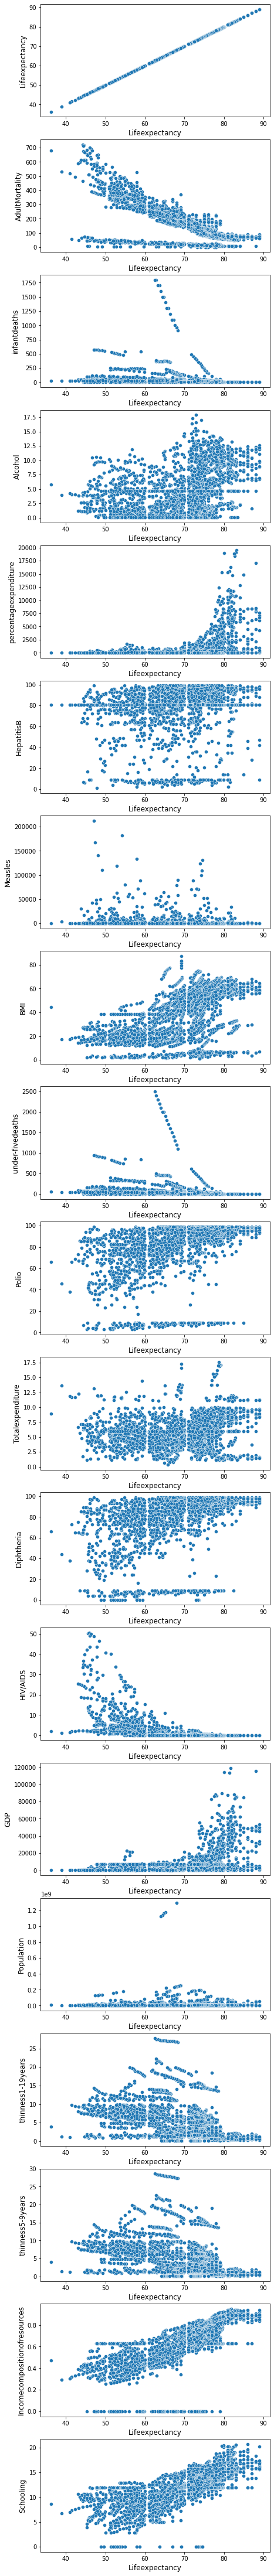

In [145]:
cols = list(data_2.columns.values)
fig, ax = plt.subplots(nrows = len(cols), ncols = 1, figsize = (7, 80))
for i in range(len(cols)):
    sns.scatterplot(ax=ax[i],
                 data=data_1, 
                 x="Lifeexpectancy", 
                 y=cols[i])
    
    ax[i].set_xlabel("Lifeexpectancy", fontsize = 12)
    ax[i].set_ylabel(cols[i], fontsize = 12)


plt.show()

In [146]:
data_1['Lifeexpectancy'].mean()

69.22493169398912

In [147]:
conditions = [
    (data_1['Lifeexpectancy'] < data_1['Lifeexpectancy'].mean()),
    (data_1['Lifeexpectancy'] > data_1['Lifeexpectancy'].mean())
    ]

# create a list of the values we want to assign for each condition
values = ['Below Average', 'Above Average']

# create a new column and use np.select to assign values to it using our lists as arguments
data_2['Life_Expectancy_Classifier'] = np.select(conditions, values)

# display updated DataFrame
data_2.head(30)

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Life_Expectancy_Classifier
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Below Average
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Below Average
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Below Average
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Below Average
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,74.2,99.0,1,5.31,3.302154,98.0,68,5.8,1,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,Above Average
26,73.5,15.0,1,5.16,26.993121,98.0,6,49.9,1,97.0,6.12,98.0,0.1,279.142931,311487.0,1.8,1.8,0.685,10.8,Above Average
27,73.0,17.0,1,4.54,221.842800,99.0,7,48.9,1,98.0,6.38,97.0,0.1,2416.588235,326939.0,1.8,1.9,0.681,10.9,Above Average
28,72.8,18.0,1,4.29,14.719289,97.0,8,47.9,1,97.0,6.27,97.0,0.1,189.681557,339616.0,1.9,2.0,0.674,10.7,Above Average


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(data_2[['AdultMortality','infantdeaths','Diphtheria','Totalexpenditure','Schooling']], data_2.Life_Expectancy_Classifier, test_size=0.2, random_state= 42)

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
classfication_model = LogisticRegression()

In [152]:

classfication_model.fit(data_2[['AdultMortality','infantdeaths','Diphtheria','Totalexpenditure','Schooling']],data_2.Life_Expectancy_Classifier)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [153]:
classfication_model.predict(X_test)

array(['Below Average', 'Above Average', 'Above Average', 'Above Average',
       'Below Average', 'Below Average', 'Above Average', 'Above Average',
       'Above Average', 'Below Average', 'Below Average', 'Below Average',
       'Above Average', 'Above Average', 'Above Average', 'Below Average',
       'Below Average', 'Above Average', 'Above Average', 'Above Average',
       'Above Average', 'Above Average', 'Above Average', 'Below Average',
       'Above Average', 'Below Average', 'Below Average', 'Below Average',
       'Above Average', 'Above Average', 'Below Average', 'Above Average',
       'Above Average', 'Below Average', 'Above Average', 'Below Average',
       'Above Average', 'Above Average', 'Below Average', 'Above Average',
       'Below Average', 'Below Average', 'Above Average', 'Above Average',
       'Above Average', 'Below Average', 'Above Average', 'Above Average',
       'Below Average', 'Below Average', 'Below Average', 'Below Average',
       'Above Average', '

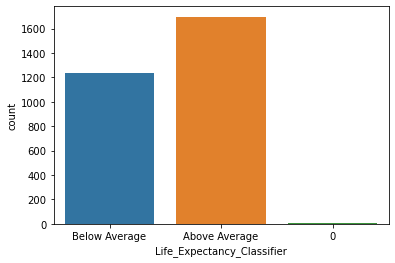

In [154]:
sns.countplot(x="Life_Expectancy_Classifier", data = data_2)

In [155]:
classfication_model.score(X_test,Y_test)

0.8758503401360545

In [156]:
classfication_model.predict([[20,2,98,4.70,9.8]])

array(['Above Average'], dtype=object)

In [93]:
data_2.head(30)

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Life_Expectancy_Classifier
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Above Average
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Above Average
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Above Average
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Above Average
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Above Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,74.2,99.0,1,5.31,3.302154,98.0,68,5.8,1,97.0,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,Below Average
26,73.5,15.0,1,5.16,26.993121,98.0,6,49.9,1,97.0,6.12,98.0,0.1,279.142931,311487.0,1.8,1.8,0.685,10.8,Below Average
27,73.0,17.0,1,4.54,221.842800,99.0,7,48.9,1,98.0,6.38,97.0,0.1,2416.588235,326939.0,1.8,1.9,0.681,10.9,Below Average
28,72.8,18.0,1,4.29,14.719289,97.0,8,47.9,1,97.0,6.27,97.0,0.1,189.681557,339616.0,1.9,2.0,0.674,10.7,Below Average


In [182]:
print("Model slopes:    ", classfication_model.coef_)
print("Model intercept:", classfication_model.intercept_)

Model slopes:     [[-5.53291829e-03 -1.38980118e+00 -1.16429263e-02  5.02133948e-01
  -3.94800328e-01]
 [-4.77182687e-03  6.90950961e-01  1.15473864e-02 -2.57894027e-01
   4.81356932e-01]
 [ 1.03047452e-02  6.98850222e-01  9.55398852e-05 -2.44239921e-01
  -8.65566038e-02]]
Model intercept: [-0.10487345 -2.29120893  2.39608238]


In [196]:
import pandas as pd

# load dataset
pima = pd.read_csv("Life Expectancy Data.csv")

In [197]:
pima.columns = pima.columns.str.replace(' ', '')
pima.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [198]:
pima.drop(['Country', 'Status', 'Year'], axis = 1)

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [199]:
pima["Schooling"] = pima["Schooling"].fillna(pima["Schooling"].mean())
pima["BMI"] = pima["BMI"].fillna(pima["BMI"].mean())
pima["Alcohol"] = pima["Alcohol"].fillna(pima["Alcohol"].mean())
pima["AdultMortality"] = pima["AdultMortality"].fillna(pima["AdultMortality"].mean())
pima["Incomecompositionofresources"] = pima["Incomecompositionofresources"].fillna(pima["Incomecompositionofresources"].mean())
pima["HepatitisB"] = pima["HepatitisB"].fillna(pima["HepatitisB"].mean())
pima["Lifeexpectancy"] = pima["Lifeexpectancy"].fillna(pima["Lifeexpectancy"].mean())
pima["thinness1-19years"] = pima["thinness1-19years"].fillna(pima["thinness1-19years"].mean())
#pima["GDP"] = pima["GDP"].pima(pima["GDP"].mean())
pima["Polio"] = pima["Polio"].fillna(pima["Polio"].mean())
pima["Totalexpenditure"] = pima["Totalexpenditure"].fillna(pima["Totalexpenditure"].mean())
pima["Diphtheria"] = pima["Diphtheria"].fillna(0)
pima["thinness5-9years"] = pima["thinness5-9years"].fillna(pima["thinness5-9years"].mean())
pima["Population"] = pima["Population"].fillna(pima["Population"].mean())

In [200]:
import numpy as np
conditions = [
    (pima['Lifeexpectancy'] < pima['Lifeexpectancy'].mean()),
    (pima['Lifeexpectancy'] > pima['Lifeexpectancy'].mean())
    ]

# create a list of the values we want to assign for each condition
values = ['Below Average', 'Above Average']

# create a new column and use np.select to assign values to it using our lists as arguments
pima['Life_Expectancy_Classifier'] = np.select(conditions, values)

# display updated DataFrame
pima.head(30)

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Life_Expectancy_Classifier
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Below Average
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Below Average
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Below Average
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Below Average
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Albania,2006,Developing,74.2,99.0,1,5.31,3.302154,98.0,68,...,5.86,97.0,0.1,35.129300,2992547.0,1.7,1.8,0.696,11.4,Above Average
26,Albania,2005,Developing,73.5,15.0,1,5.16,26.993121,98.0,6,...,6.12,98.0,0.1,279.142931,311487.0,1.8,1.8,0.685,10.8,Above Average
27,Albania,2004,Developing,73.0,17.0,1,4.54,221.842800,99.0,7,...,6.38,97.0,0.1,2416.588235,326939.0,1.8,1.9,0.681,10.9,Above Average
28,Albania,2003,Developing,72.8,18.0,1,4.29,14.719289,97.0,8,...,6.27,97.0,0.1,189.681557,339616.0,1.9,2.0,0.674,10.7,Above Average


In [201]:
feature_cols = ['AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB','Polio','Totalexpenditure']
X = pima[feature_cols] # Features
y = pima.Life_Expectancy_Classifier # Target variable

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [203]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
#logreg.fit(pima[['AdultMortality','infantdeaths','Alcohol','HepatitisB','Polio','Totalexpenditure']],pima.Life_Expectancy_Classifier)

logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [204]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   1,   0],
       [  0, 385,  45],
       [  0,  74, 230]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

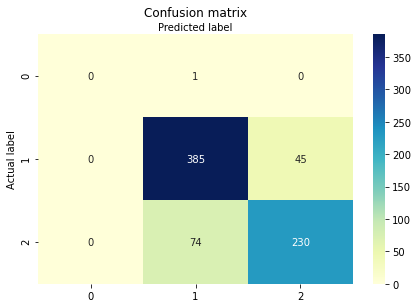

In [205]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [206]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8367346938775511
